In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("../input/videogamesales/vgsales.csv")

In [4]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
df.describe()



,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
df.dropna(inplace= True)

In [9]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
df["Year"]= df.Year.apply(lambda x: int(x))

In [11]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
df.Year.unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

In [13]:
df.shape

(16291, 11)

Text(0.5, 0, 'global sales(in million)')

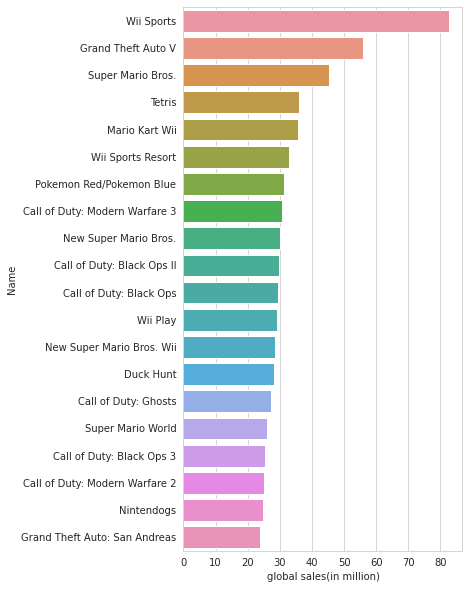

In [43]:
#top 20 games with most sales
x= df.groupby("Name").Global_Sales.sum().sort_values(ascending= False).head(20)
plt.figure(figsize= (5,10))
sns.set_style("whitegrid")
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("global sales(in million)")

Wii sports tops the table with most global sales  followed by other popualar games like GTA V and super mario ,also majority of call of duty games have made it to the top 20 list by sales

Text(0.5, 0, 'global sales(in million)')

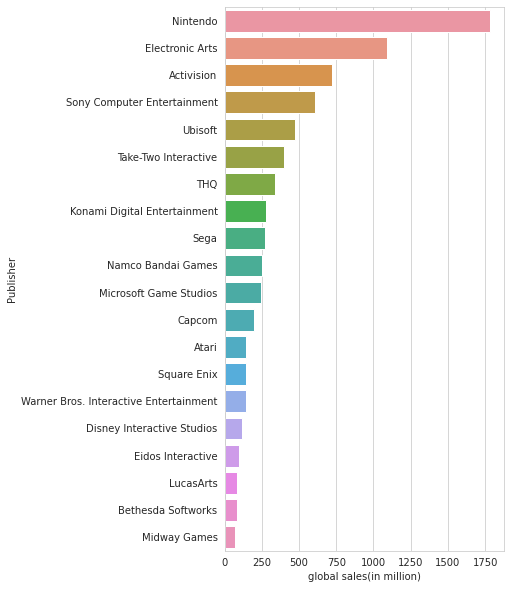

In [15]:
#top 10 Publishers with most sales
x= df.groupby("Publisher").Global_Sales.sum().sort_values(ascending= False).head(20)
plt.figure(figsize= (5,10))
sns.set_style("whitegrid")
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("global sales(in million)")

Nintendo has done top business as a publisher while electronic arts and activision have followed 2nd and 3rd respectively 

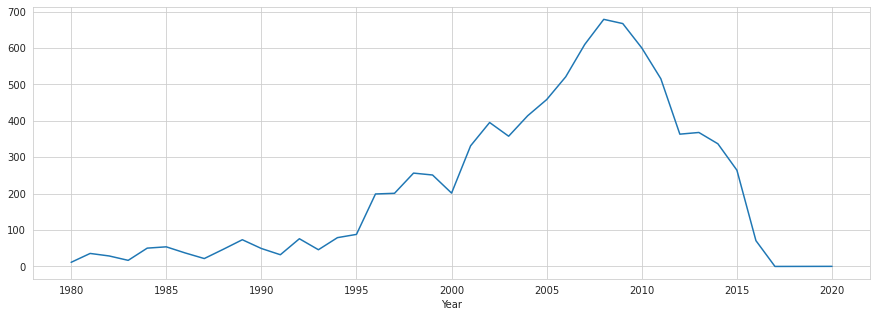

In [16]:
#global sales over the years
plt.figure(figsize= (15,5))
x=df.groupby("Year").Global_Sales.sum()
ax= sns.lineplot(x.index,x.values)



Global sales increase between mid 2000s and reach a peak in 2008 and 2009

In [17]:
df.groupby("Genre").Global_Sales.sum().sort_values(ascending= False)

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64

Action followed by sports and shooter games do the best business in video game market

Text(0.5, 0, 'sales')

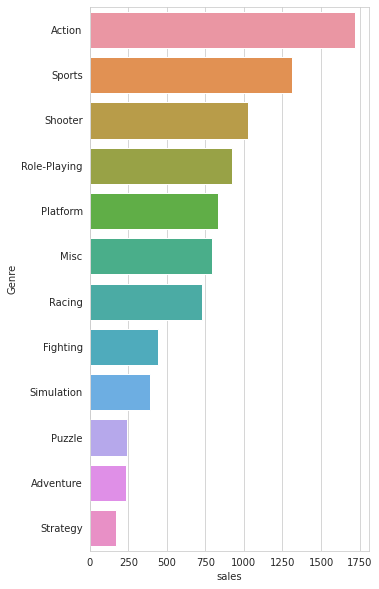

In [18]:
plt.figure(figsize= (5,10))

x= df.groupby("Genre").Global_Sales.sum().sort_values(ascending= False)
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("sales")

<AxesSubplot:xlabel='Genre', ylabel='count'>

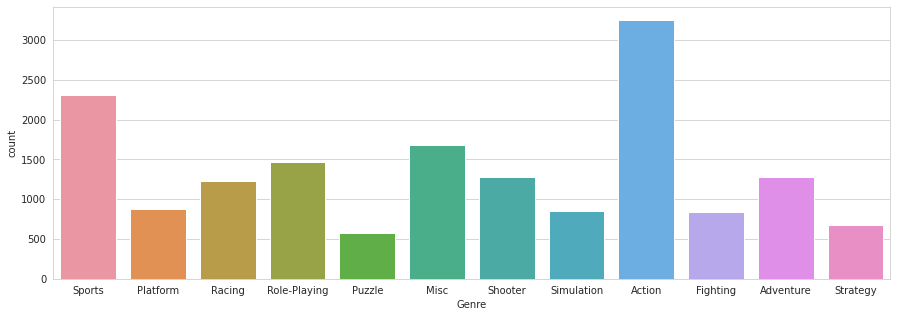

In [19]:
#Games per genre
plt.figure(figsize= (15,5))
sns.countplot(x= "Genre",data= df)

<AxesSubplot:>

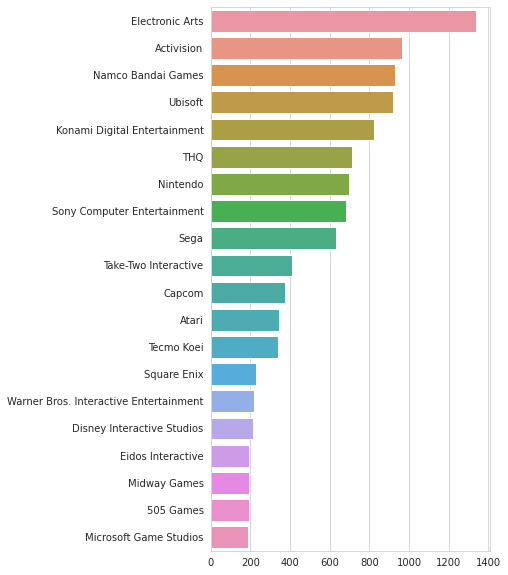

In [20]:
#publishers who published most games
x= df.Publisher.value_counts().head(20)
plt.figure(figsize= (5,10))
sns.barplot(x.values,x.index)

In [21]:
#Top gaming platforms with most sales
df.groupby("Platform").Global_Sales.sum().sort_values(ascending= False).head(10)

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64

In [22]:
#gaming platforms with most games
df.Platform.value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<AxesSubplot:xlabel='Platform', ylabel='count'>

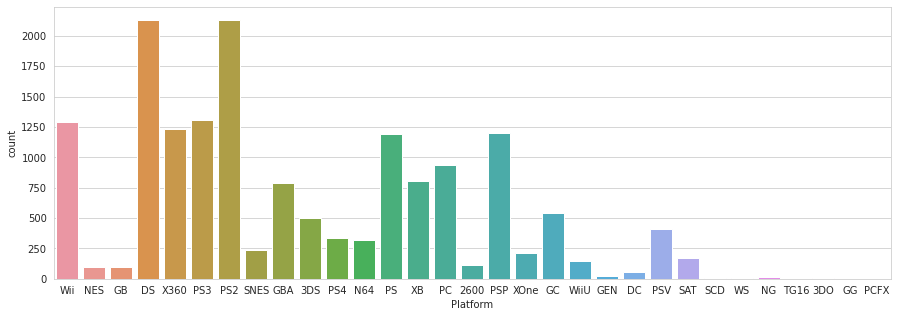

In [23]:
plt.figure(figsize= (15,5))

sns.countplot(x= "Platform",data= df)

In [24]:
#North American vs Europian game sales

<AxesSubplot:xlabel='NA_Sales', ylabel='EU_Sales'>

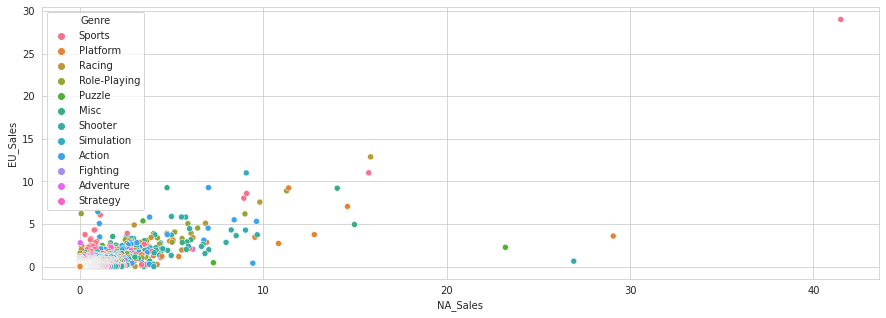

In [25]:
plt.figure(figsize= (15,5))

sns.scatterplot(x= "NA_Sales",y= "EU_Sales",data= df,hue= "Genre")

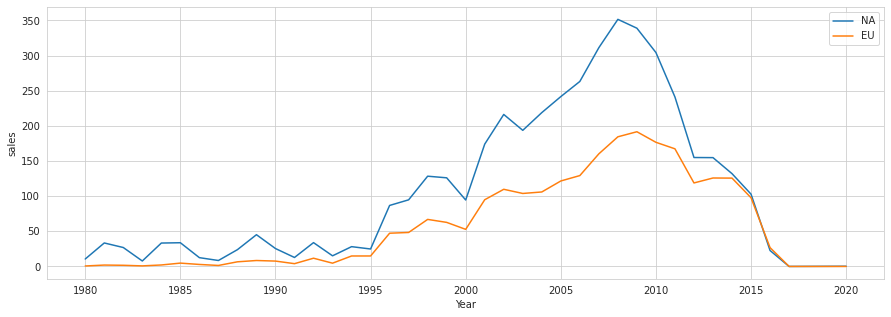

In [26]:
plt.figure(figsize= (15,5))
n= df.groupby("Year").NA_Sales.sum()
e= df.groupby("Year").EU_Sales.sum()
ax=sns.lineplot(n.index,n.values,label= "NA")
ax= sns.lineplot(e.index,e.values,label= "EU")
ax.set_ylabel("sales"),
plt.show()



In [27]:
#Japan vs NA region sales

<AxesSubplot:xlabel='NA_Sales', ylabel='JP_Sales'>

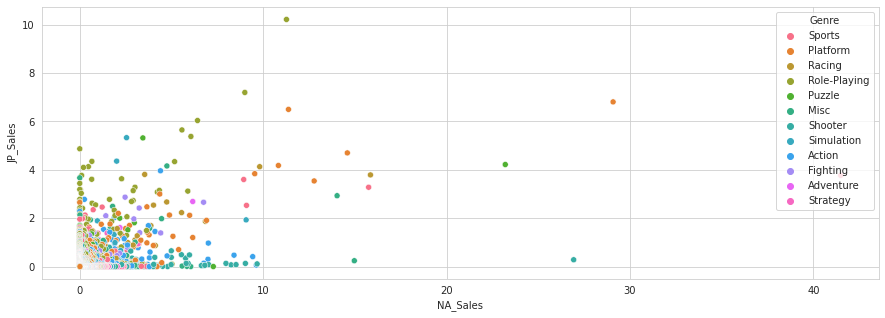

In [28]:
plt.figure(figsize= (15,5))

sns.scatterplot(x= "NA_Sales",y= "JP_Sales",data= df,hue= "Genre")

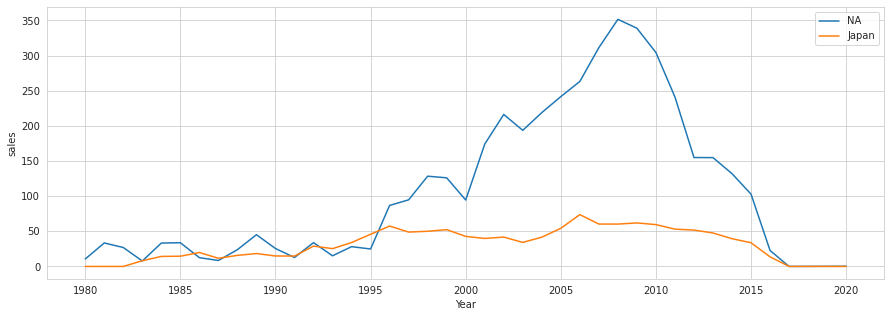

In [29]:
plt.figure(figsize= (15,5))
n= df.groupby("Year").NA_Sales.sum()
e= df.groupby("Year").JP_Sales.sum()
ax=sns.lineplot(n.index,n.values,label= "NA")
ax= sns.lineplot(e.index,e.values,label= "Japan")
ax.set_ylabel("sales"),
plt.show()

In [30]:
#Europe vs Japan sales

<AxesSubplot:xlabel='JP_Sales', ylabel='EU_Sales'>

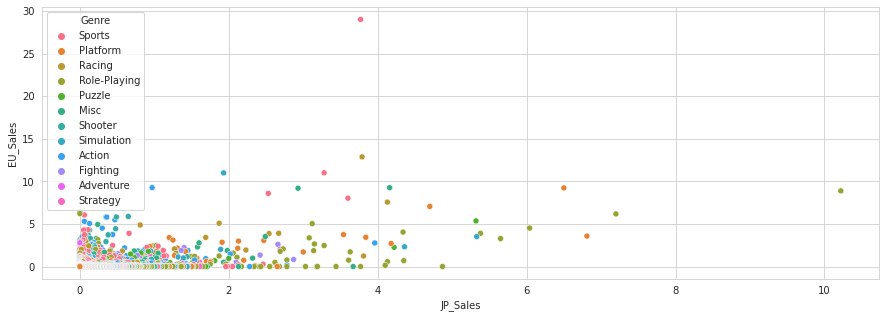

In [31]:
plt.figure(figsize= (15,5))

sns.scatterplot(x= "JP_Sales",y= "EU_Sales",data= df,hue= "Genre")

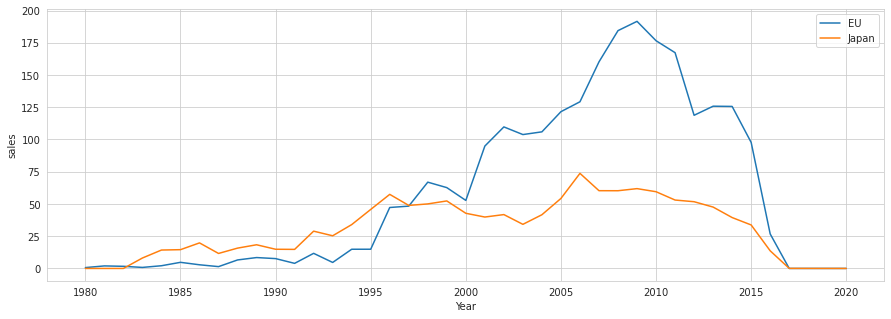

In [32]:
plt.figure(figsize= (15,5))
n= df.groupby("Year").EU_Sales.sum()
e= df.groupby("Year").JP_Sales.sum()
ax=sns.lineplot(n.index,n.values,label= "EU")
ax= sns.lineplot(e.index,e.values,label= "Japan")
ax.set_ylabel("sales"),
plt.show()

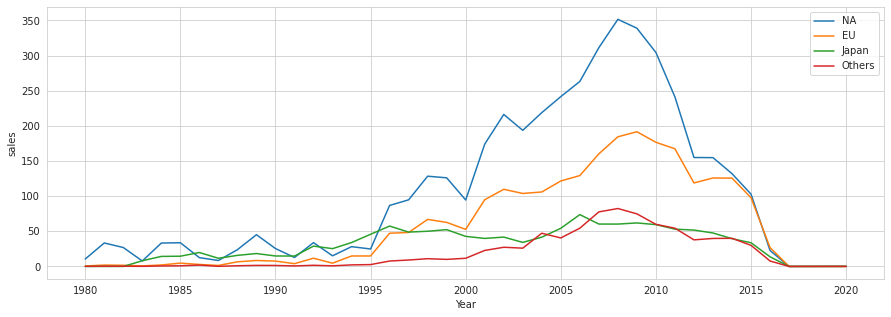

In [33]:
#all region sales comparison
plt.figure(figsize= (15,5))
n= df.groupby("Year").NA_Sales.sum()
e= df.groupby("Year").EU_Sales.sum()
j= df.groupby("Year").JP_Sales.sum()
o= df.groupby("Year").Other_Sales.sum()


ax=sns.lineplot(n.index,n.values,label= "NA")
ax= sns.lineplot(e.index,e.values,label= "EU")
ax= sns.lineplot(j.index,j.values,label= "Japan")

ax= sns.lineplot(o.index,o.values,label= "Others")

ax.set_ylabel("sales"),
plt.show()


<AxesSubplot:>

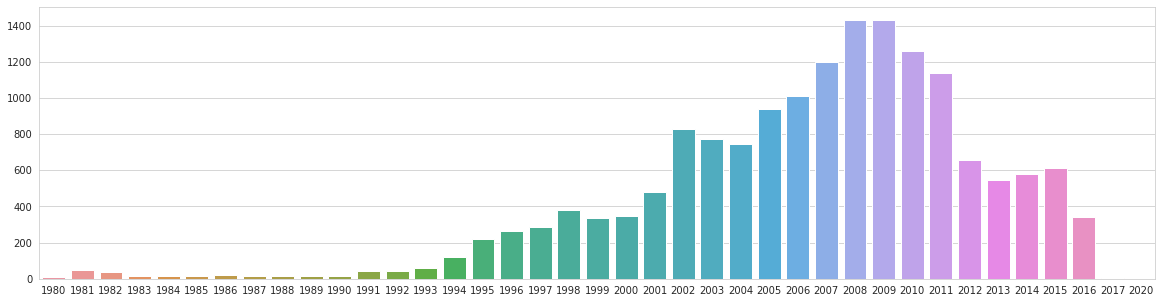

In [34]:
#Games released per year
x= df.Year.value_counts()
plt.figure(figsize= (20,5))

sns.barplot(x.index,x.values)

In [35]:
#top games in North American region
df.groupby("Name").NA_Sales.sum().sort_values(ascending= False).head(10)

Name
Wii Sports                        41.49
Super Mario Bros.                 32.48
Duck Hunt                         26.93
Tetris                            26.17
Grand Theft Auto V                23.46
Call of Duty: Black Ops           17.01
Super Mario World                 15.99
Mario Kart Wii                    15.85
Wii Sports Resort                 15.75
Call of Duty: Modern Warfare 3    15.58
Name: NA_Sales, dtype: float64

In [36]:
#top Publishers with most sales in North American region
df.groupby("Publisher").NA_Sales.sum().sort_values(ascending= False).head(10)

Publisher
Nintendo                       815.75
Electronic Arts                584.22
Activision                     426.01
Sony Computer Entertainment    265.22
Ubisoft                        252.81
Take-Two Interactive           220.47
THQ                            208.60
Microsoft Game Studios         155.35
Sega                           108.78
Atari                          101.23
Name: NA_Sales, dtype: float64

<AxesSubplot:ylabel='Platform'>

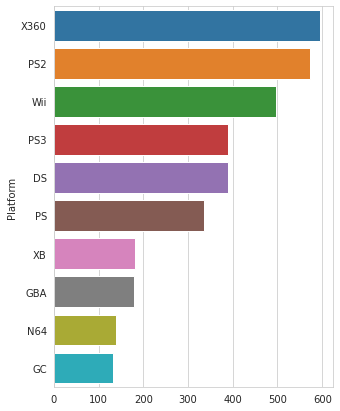

In [37]:
#top Platforms with most sales in North American region
x= df.groupby("Platform").NA_Sales.sum().sort_values(ascending= False).head(10)
plt.figure(figsize= (5,7))
sns.barplot(x.values,x.index)

In [38]:
#top games in Japan
df.groupby("Name").JP_Sales.sum().sort_values(ascending= False).head(10)

Name
Pokemon Red/Pokemon Blue              10.22
Pokemon Gold/Pokemon Silver            7.20
Super Mario Bros.                      6.96
New Super Mario Bros.                  6.50
Pokemon Diamond/Pokemon Pearl          6.04
Tetris                                 6.03
Pokemon Black/Pokemon White            5.65
Dragon Quest VII: Warriors of Eden     5.40
Pokemon Ruby/Pokemon Sapphire          5.38
Animal Crossing: Wild World            5.33
Name: JP_Sales, dtype: float64

<AxesSubplot:ylabel='Name'>

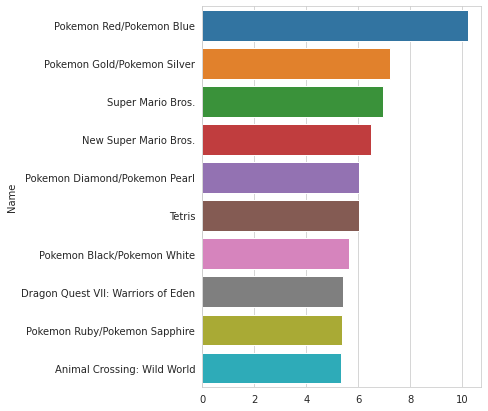

In [39]:
x= df.groupby("Name").JP_Sales.sum().sort_values(ascending= False).head(10)
plt.figure(figsize= (5,7))

sns.barplot(x.values,x.index)

In [40]:
#top Publisher in Japan
df.groupby("Publisher").JP_Sales.sum().sort_values(ascending= False).head(10)

Publisher
Nintendo                        454.99
Namco Bandai Games              126.84
Konami Digital Entertainment     90.93
Sony Computer Entertainment      74.10
Capcom                           67.38
Sega                             56.19
Square Enix                      49.79
SquareSoft                       40.13
Enix Corporation                 32.40
Tecmo Koei                       29.21
Name: JP_Sales, dtype: float64

In [41]:
#top Platform in Japan
df.groupby("Platform").JP_Sales.sum().sort_values(ascending= False).head(10)

Platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
NES      98.65
3DS      97.30
GB       85.12
PS3      79.21
PSP      75.89
Wii      68.28
Name: JP_Sales, dtype: float64

In [44]:
#top games in Europe
df.groupby("Name").EU_Sales.sum().sort_values(ascending= False).head(10)

Name
Wii Sports                        29.02
Grand Theft Auto V                23.04
Mario Kart Wii                    12.88
FIFA 15                           12.40
Call of Duty: Modern Warfare 3    11.29
FIFA 16                           11.29
FIFA 14                           11.14
Call of Duty: Black Ops II        11.05
Wii Sports Resort                 11.01
Nintendogs                        11.00
Name: EU_Sales, dtype: float64

In [45]:

#top Platforms in Europe
df.groupby("Platform").EU_Sales.sum().sort_values(ascending= False).head(10)


Platform
PS3     340.47
PS2     332.63
X360    278.00
Wii     264.35
PS      212.38
DS      194.05
PC      137.35
PS4     123.70
GBA      72.49
PSP      67.16
Name: EU_Sales, dtype: float64

In [46]:
#top Publisher in Europe
df.groupby("Publisher").EU_Sales.sum().sort_values(ascending= False).head(10)

Publisher
Nintendo                        418.30
Electronic Arts                 367.38
Activision                      213.72
Sony Computer Entertainment     187.55
Ubisoft                         163.03
Take-Two Interactive            117.95
THQ                              94.60
Sega                             81.41
Konami Digital Entertainment     68.62
Microsoft Game Studios           68.61
Name: EU_Sales, dtype: float64